In [44]:
import pandas as pd 

googl = pd.read_csv(r'C:\AIEBA Datasets\Proj1 Datasets\GoogleRestaurantReview.csv',encoding='utf-8',engine='python')

# Drop columns that are not needed and standardize column names
googl = googl.filter(items=['rating', 'review_text'])
googl = googl.rename(columns={"rating":"reviews_rating", "review_text":"reviews_text"})

googl = googl.dropna()
googl.head()

,reviews_rating,reviews_text
0,4.0,We came for a birthday brunch and this place i...
1,5.0,"Cool place to hang out, have drinks. There is..."
2,2.0,This place doesnâ€™t rock the senses when it c...
3,3.0,Pretty cool place to hang out with friends and...
4,5.0,We saw this place the other day when we had re...


2.0     27564
1.0     43171
3.0     62595
4.0    203754
5.0    711468
Name: reviews_rating, dtype: int64

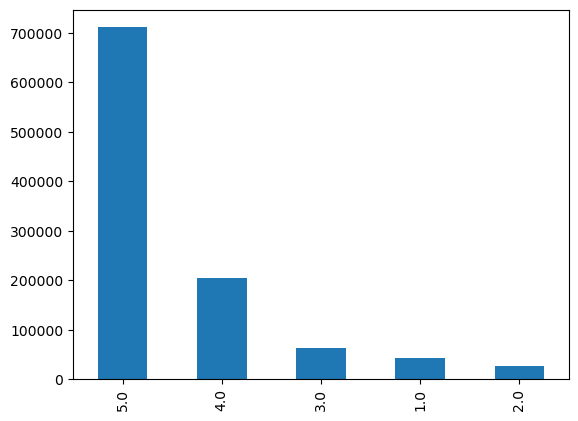

In [45]:
googl["reviews_rating"].value_counts().plot.bar()
googl["reviews_rating"].value_counts(ascending=True)

,reviews_rating,reviews_text
806742,5.0,"Good service, great price, very big portions!\..."
254451,5.0,"Surprising gem in Overland Park. Upscale feel,..."
998307,5.0,(Translated by Google) Very rich\n\n(Original)...
830697,5.0,This place has instantly grown into one of my ...
482064,5.0,Burritos that make your hands look small! Huge...
...,...,...
275951,1.0,We went with rating and reviews on this place....
583252,1.0,Should be called the The Bagel Scam. Half an...
964067,1.0,The fried seafood was over fried! It was greas...
433542,1.0,"""Soggy Clam Strip Mess""\n\nOrdered the fried c..."


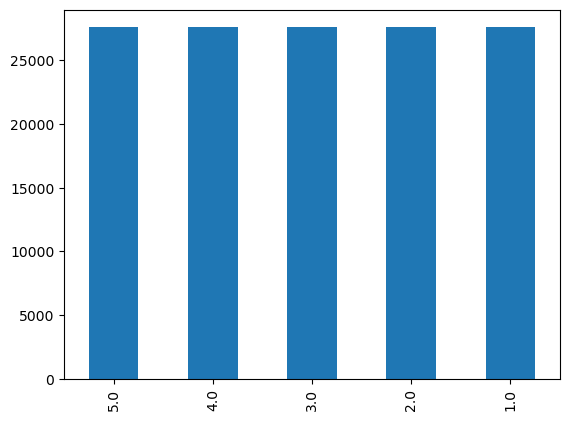

In [46]:
# perform undersampling to get balanced dataset

least_class_amount, class_1, class_3, class_4, class_5 = googl.reviews_rating.value_counts(ascending=True)

# create separate dataframes for each rating
c5 = googl[googl["reviews_rating"] == 5.0]
c4 = googl[googl["reviews_rating"] == 4.0]
c3 = googl[googl["reviews_rating"] == 3.0]
c2 = googl[googl["reviews_rating"] == 2.0]
c1 = googl[googl["reviews_rating"] == 1.0]

# randomly remove data to in each dataframe to match the number of rows in c2 which has the least amount of data
df_5 = c5.sample(least_class_amount, random_state=100)
df_4 = c4.sample(least_class_amount, random_state=100)
df_3 = c3.sample(least_class_amount, random_state=100)
df_1 = c1.sample(least_class_amount, random_state=100)

# concatenate all 5 dataframes into 1
undersampled = pd.concat([df_5, df_4, df_3, c2, df_1], axis=0)
googl = undersampled
googl.reviews_rating.value_counts().plot.bar()
googl.reviews_rating.value_counts()
googl

In [47]:
# remove non-ascii characters
googl["reviews_text"] = googl["reviews_text"].str.encode('ascii', 'ignore').str.decode('ascii')

In [48]:
# using regular expressions to remove unwanted characters and punctuations
import re

def cleanup(sentence):
  sentence = str(sentence).lower()
  sentence = cleanup_re.sub('',sentence).strip() 
  sentence = re.sub('[\d]','',sentence) # remove all digits and numbers
  return sentence
  
cleanup_re = re.compile('[^\w\s]') # match whitespaces words only
googl["reviews_text"] = googl["reviews_text"].apply(cleanup)
googl

,reviews_rating,reviews_text
806742,5.0,good service great price very big portions\n\n...
254451,5.0,surprising gem in overland park upscale feel s...
998307,5.0,translated by google very rich\n\noriginal\nmu...
830697,5.0,this place has instantly grown into one of my ...
482064,5.0,burritos that make your hands look small huge ...
...,...,...
275951,1.0,we went with rating and reviews on this place ...
583252,1.0,should be called the the bagel scam half an ...
964067,1.0,the fried seafood was over fried it was greasy...
433542,1.0,soggy clam strip mess\n\nordered the fried cla...


In [49]:
# remove stopwords 
import nltk
from nltk.corpus import stopwords

def remove_stopwords(sentence):
  sentence = sentence.split()
  sentence = [word for word in sentence if word not in stoplist]
  sentence = ' '.join(sentence)
  return sentence
    

def custom_stoplist():
  stop_words = set(stopwords.words('english'))
  wanted_stopwords = {'not', 'nor', 'no', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'very'} # stopwords that can change a sentence's meaning
  stoplist = stop_words - wanted_stopwords
  return stoplist

stoplist = custom_stoplist()
googl["reviews_text"] = googl["reviews_text"].apply(remove_stopwords)
googl

,reviews_rating,reviews_text
806742,5.0,good service great price very big portions nb ...
254451,5.0,surprising gem overland park upscale feel serv...
998307,5.0,translated google very rich original muy rico
830697,5.0,place has instantly grown one favorite places ...
482064,5.0,burritos make hands look small huge portions d...
...,...,...
275951,1.0,went rating reviews place mistake had redo wou...
583252,1.0,called bagel scam half egg piece bacon average...
964067,1.0,fried seafood fried greasy taste poor returned...
433542,1.0,soggy clam strip mess ordered fried clam strip...


In [50]:
# perform 80-20 split on data
from sklearn.model_selection import train_test_split
train, test = train_test_split(amzn, test_size=0.2, train_size=0.8, random_state=100) 
# random_state controls how data is being shuffled
# ensures that data is being shuffled the same way every time the cell is being ran
train

,reviews_rating,reviews_text
4151,4.0,got father law loves play games read books news
34566,3.0,loyal roku since got k tv wanted something str...
23128,3.0,like doesnt always get commands correct doesnt...
2928,1.0,had return product not compatible things faceb...
14558,3.0,first tablet would recommend youve ever had ip...
...,...,...
3100,1.0,actually paid adapter youre mind
14413,1.0,purchased amazon fire reviews good realized le...
4683,1.0,got tablet christmas used one day next day cou...
10580,4.0,youre getting value tablet great choiceprofile...


In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


def remove_stopwords():
  import nltk
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  print(stop_words)


training_sentences = train["reviews_text"].tolist()
training_labels = train["reviews_rating"].tolist()
test_sentences = test["reviews_text"].tolist()
test_labels = test["reviews_rating"].tolist()
vocab_size = 20000 # number of words that will be fed into model 
max_length = 100 #
trunc_type='post' # 
padding_type='post' #
oov_tok = "<OOV>" # placeholder if model encounters words it has never seen before in the test set

# Tokenization - breaking down sentences into its individual words and assigning a number to it
tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index # Model's 'vocabulary' learnt from training data

# Sequencing - converting each sentence into its numerical equivalent
# Padding and truncating used to make all sentences same length 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type,
                               truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type,
                               truncating=trunc_type)

In [52]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = tf.keras.utils.to_categorical(training_labels)
test_padded = np.array(test_padded)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [53]:
test_labels

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [54]:
import keras
import keras_tuner as kt
num_of_ratings = 6 # number of possible ratings given by users: 1 to 5

def model_builder(hp): 

    # Tuning params 
    filters = hp.Int('filters', min_value=32, max_value=128, step=32)
    kernel_size = hp.Choice('kernel_size', values=[3,4,5])
    embedding_dim = hp.Int('output_dim', min_value=8, max_value=128, step=8)
    dropout = hp.Boolean('dropout')
    dropout_rate = hp.Choice('rate', values=[0.2,0.3,0.4,0.5])
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Creating model 
    model = keras.Sequential()
    model.add(keras.layers.Embedding(vocab_size, output_dim=embedding_dim, input_length=max_length))
    model.add(keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(keras.layers.GlobalAveragePooling1D())
    if dropout:
        model.add(keras.layers.Dropout(rate = dropout_rate))
    for i in range(hp.Int('layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int('units_'+ str(i), 20, 100, step=10), activation='relu')) 

    model.add(keras.layers.Dense(num_of_ratings, activation='softmax'))                                                                        

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [55]:
#USE RANDOM SEARCH INSTAD OF HYPERBAND 

#using hyperband to search for the best parameters 
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [56]:
#early stopping  
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [58]:
tuner.search(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels), callbacks=[stop_early])

Trial 25 Complete [00h 00m 08s]
val_accuracy: 0.3606965243816376

Best val_accuracy So Far: 0.39303481578826904
Total elapsed time: 00h 02m 12s
INFO:tensorflow:Oracle triggered exit


In [40]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
hypermodel_hb= tuner.hypermodel.build(best_hps)
hypermodel_hb.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 24)           480000    
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 96)            9312      
                                                                 
 global_average_pooling1d_1   (None, 96)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_3 (Dense)             (None, 90)                8730      
                                                                 
 dense_4 (Dense)             (None, 60)                5460      
                                                      

In [41]:
sentence = ["product was great"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
output= hypermodel_hb.predict(padded)

print(output)
print("Review:", sentence)
print("Rating:", np.argmax(output, axis=None, out=None))

1/1 [==============================] - 0s 137ms/step
[[0.16492331 0.16737996 0.1671398  0.16605547 0.1671653  0.1673362 ]]
Review: ['product was great']
Rating: 1
